### Stock Market Prediction-Datasets-Exercise-3-Timothy Gregorian

In this analysis we will examine two timeseries datasets for the Convolutional Neural Networks project (CNN), which shows stock market data of certain companies. 

The goal of this project is to build a Convolutional Neural Network (CNN) model which should be able to clasify and compare two stocks based on the time series variables "Price" and "Volume".

### Link to the Datasets

1) https://www.kaggle.com/datasets/muhammadatiflatif/complete-microsoft-stock-dataset-19862025

2) https://www.kaggle.com/datasets/avinashmynampati/nvidia-stock-volatility-20142024

### Information about the Datasets

Both datasets contain daily trading recors over multiple years, including important financial variables such as Open, High, Low, Close and Volume.

One dataset shows the Microsoft stock market data starting from the 13th of March in the year 1986 until the 4th of April 2025. The other dataset shows the NVIDIA stock market data starting from the 31th of January 2014 until the 6th of March 2024.

For this CNN time series classification project, the varaibles "Price" and "Volume" were used make comparisons between the 2 chosen stocks (MSFT and NVIDIA) through the usage of the model.

### Note
Throughout this project, I followed the lecturer's GitHub examples as well as the given links about the topic CNN.

I only used AI as well as external sources when no examples or references were available in the provided Github scripts and if certain optimizations were necessary to improve the model's performance.

### Data Description

#### 1) Microsoft (MSFT) Stock Dataset

Variables:

1) date: The trading day
2) open: Opening price of the stock on each trading day
3) high: The highest price reached during the trading day
4) low: The lowest price reached during the trading day
5) close: The final closing price  of the stock at market close
6) adj_close: Adjusted closing price after the corporate actions (usually splits or dividends)
7) volume: The total number of shares traded during the trading day.


#### 2) NVIDIA (NVDA) Stock Dataset

Variables: 

1) Date: The trading day
2) Open: Opening price of the stock on each trading day
3) High: The highest price reached during the trading day
4) Low: The lowest price reached during the trading day
5) Close: The final closing price  of the stock at market close
6) Volume: The total number of shares traded during the trading day
7) Daily_Return: Percentage change in stock price from the previous day
8) Rolling_Votality: 20-day rolling standard deviation of Daily_Return
9) ATR: (Average True Range) Measures daily price range fluctuations (14-day window)
10) Rolling_Mean: 20-day moving average of the Close price
11) Upper_Band: Upper Bollinger Band (20-day mean + 2 standard deviations)
12) Lower_Band: Lower Bollinger Band (20-day mean - 2 standard deviations)


### Import/Modules

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

### AI and External Sources used for code cell below

TO start with, we do not need to use the method "time-series data interpolation" for this project, since we do not have missing values in the dataset. Although the variable "date" does not cover all days in a row, it is still complete, because stocks are traded from monday to friday in certain time.

The idea is to combine both stockmarket datasets into one and only use the necessary variables for the model to classify. In this case "date","close" and "volume". 

Before we combine both datasets, we need to see which variables we need for the model, because we have differetn variables in both datasets. 

Unfortunately we cannot combine both datasets with their columns jsut like that due to the reason that the column names are not the same.

We used the code samples from the following links:
1) https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html

2) https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

3) https://pandas.pydata.org/docs/user_guide/timeseries.html

4) https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.tz_localize.html

I had to implement this code, because I have gotten timestamp errors, because of the structure of the varaible "date" in the Microsoft stock-dataset. Besides the date, the time has also been included into the dataset.

I have used AI with the help of the documentation of the official Pandas Website to fix the error with the time stamp and find also a way to combine both datasets into one with the same variables, which was a big challenge.

I am sure that the AI output is correct, because both date columns of both datasets were combined into one column with a datetime format, then the time zone information was removed, where the time was set to 00:00:00, so that only the date plays an important role for the training of the model.


In [2]:
df1 = pd.read_csv("MSFT_1986-03-13_2025-04-06.csv")
df2 = pd.read_csv("NVIDIA_Stock_Volatility_2014_2024.csv")

df1 = df1.rename(columns={"date": "date", "close": "close", "volume": "volume"})
df2 = df2.rename(columns={"Date": "date", "Close": "close", "Volume": "volume"})

df1 = df1[["date", "close", "volume"]]
df2 = df2[["date", "close", "volume"]]

df1["date"] = pd.to_datetime(df1["date"])
df2["date"] = pd.to_datetime(df2["date"])

df1["date"] = pd.to_datetime(df1["date"], errors= "coerce").dt.tz_localize(None)
df2["date"] = pd.to_datetime(df2["date"], errors= "coerce").dt.tz_localize(None)

df1 = df1[(df1["date"] >= "2020-01-01") & (df1["date"] <= "2023-12-31")]
df2 = df2[(df2["date"] >= "2020-01-01") & (df2["date"] <= "2023-12-31")]

C:\Users\Timothy\AppData\Local\Temp\ipykernel_26416\2161152964.py:10: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df1["date"] = pd.to_datetime(df1["date"])


In [3]:
df = pd.concat([df1, df2])
df = df.reset_index()

Although I used the method "reset_index()" according to the table code cell below, the index number starts from the number 8521 instead of 0. The reason for this is, because for the model to classify types stocks we need recent historical data (In this case 2020-01-01 until 2023-12-31).

In [4]:
df.head()

,index,date,close,volume
0,8521,2020-01-02,160.619995,22622100
1,8522,2020-01-03,158.619995,21116200
2,8523,2020-01-06,159.029999,20813700
3,8524,2020-01-07,157.580002,21634100
4,8525,2020-01-08,160.089996,27746500


### Handle missing values

In [5]:
len(df)

1350

In [6]:
print(df.duplicated().sum())

0


No missing values.

In [7]:
print(df.isnull().sum())

index     0
date      0
close     0
volume    0
dtype: int64


In [8]:
df.head()

,index,date,close,volume
0,8521,2020-01-02,160.619995,22622100
1,8522,2020-01-03,158.619995,21116200
2,8523,2020-01-06,159.029999,20813700
3,8524,2020-01-07,157.580002,21634100
4,8525,2020-01-08,160.089996,27746500


The results below indicate that both datasets combined offer enough variation for model training with a high standard deviation for the variable volume and close.

In [9]:
df.describe()

,index,date,close,volume
count,1350.000000,1350,1350.000000,1.350000e+03
mean,3781.902222,2021-12-27 05:29:36,82.440073,3.539976e+08
min,1490.000000,2020-01-02 00:00:00,4.892427,9.200800e+06
25%,1827.250000,2020-12-30 06:00:00,13.823102,7.425600e+07
50%,2164.500000,2021-12-30 00:00:00,22.606634,3.687440e+08
75%,8526.750000,2022-12-29 00:00:00,161.159996,5.178410e+08
max,9526.000000,2023-12-29 00:00:00,382.700012,1.543911e+09
std,3075.121203,NaN,109.920923,2.498417e+08


In CNN-projects it is important to scale values with MinMaxScaler(), so that the model performs even better.

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_cols = ['close', 'volume']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [11]:
df.head()

,index,date,close,volume
0,8521,2020-01-02,0.412188,0.008745
1,8522,2020-01-03,0.406894,0.007764
2,8523,2020-01-06,0.407979,0.007567
3,8524,2020-01-07,0.404141,0.008101
4,8525,2020-01-08,0.410785,0.012084


Convert time series data (date) to numeric integer sequences starting from 1:

In [12]:
df['sequence'] = df.index + 1
df = df.drop(['date', 'index'], axis=1)

In [13]:
df.head()

,close,volume,sequence
0,0.412188,0.008745,1
1,0.406894,0.007764,2
2,0.407979,0.007567,3
3,0.404141,0.008101,4
4,0.410785,0.012084,5


In [14]:
df.tail()

,close,volume,sequence
1345,0.116260,0.158536,1346
1346,0.117448,0.153123,1347
1347,0.117813,0.146247,1348
1348,0.118091,0.154678,1349
1349,0.118091,0.247664,1350


### Alternative

I have used Alternative 1, because my dataset is no that large, so I can work with more data.

I lowered the timestep_size to 40, to reduce the risk of overfitting, due to my small dataset.

In [15]:
from numpy.lib.stride_tricks import sliding_window_view

timestep_size = 40

close = df['close'].values
volume = df['volume'].values

close_windows = sliding_window_view(close, window_shape=timestep_size)
volume_windows = sliding_window_view(volume, window_shape=timestep_size)

X = np.vstack((close_windows, volume_windows))

y = np.array([0] * len(close_windows) + [1] * len(volume_windows))

print("X:", X.shape)
print("y:", y.shape)

X: (2622, 40)
y: (2622,)


### Shuffle the data

In [16]:
from sklearn.utils import shuffle

X, y = shuffle(X, y, random_state=7)

### Visualize some test signals

I tested different test signal indexes to see which graph shows the best results. With a test signal index of 3 we have the best stong upward trend for Close and distinct fluctuations for the varaible volume.

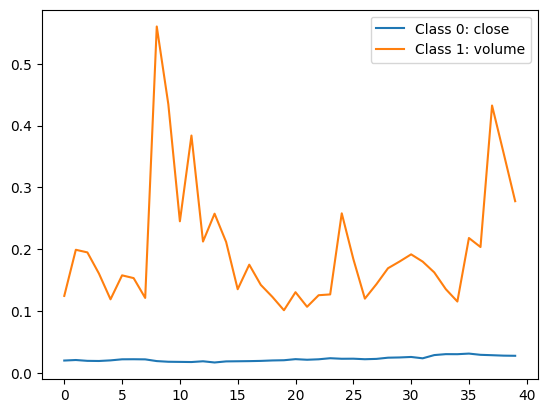

In [17]:
test_signal_index = 3

c_x_train = X[y == 0]
plt.plot(c_x_train[test_signal_index], label="Class 0: close")

c_x_train = X[y == 1]
plt.plot(c_x_train[test_signal_index], label="Class 1: volume")
plt.legend()

### Train/Test - Split

In [18]:
train_size = 0.7
splitter = int(len(X) * train_size)

x_train = X[0:splitter]
x_test = X[splitter:]
y_train = y[0:splitter]
y_test = y[splitter:]

In [19]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

1835
787
1835
787


In [20]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

It is important to observe if the train data has the right array format. In this case the array format should be fine.

In [21]:
x_train


array([[[0.3723486 ],
        [0.31977581],
        [0.52605319],
        ...,
        [0.21691079],
        [0.2009208 ],
        [0.23437337]],

       [[0.23841517],
        [0.52331196],
        [0.40274262],
        ...,
        [0.2225972 ],
        [0.2280712 ],
        [0.32613792]],

       [[0.12150255],
        [0.12689184],
        [0.15616121],
        ...,
        [0.10251916],
        [0.09567422],
        [0.18589972]],

       ...,

       [[0.00570499],
        [0.02501671],
        [0.01097321],
        ...,
        [0.02022115],
        [0.03735285],
        [0.01580344]],

       [[0.37036908],
        [0.41844786],
        [0.33873835],
        ...,
        [0.33456492],
        [0.4961785 ],
        [0.49515941]],

       [[0.40902002],
        [0.77704781],
        [0.46807221],
        ...,
        [0.17182345],
        [0.26130484],
        [0.20187994]]], shape=(1835, 40, 1))

Because the dataset is not that complex, we use one convolutional layer and then a pooling layer, a flatten layer and Dense layers. If I ad a more complex dataset, with more variables to classify and different stock companies, I would have used probably 3 convolutional layers.

In [41]:
class_names = np.array(['close', 'volume'])
num_classes = len(class_names)
classes = [0, 1]

def make_model(input_shape):
    model5 = keras.Sequential(
        [
            keras.layers.Input(input_shape),

            keras.layers.Conv1D(filters=64, kernel_size=3, padding="same"),
            keras.layers.BatchNormalization(),
            keras.layers.ReLU(),

            keras.layers.GlobalAveragePooling1D(),
            keras.layers.Flatten(),

            keras.layers.Dense(64, activation="relu"),

            keras.layers.Dense(num_classes, activation="softmax")
        ]
    )

    return model5


model = make_model(input_shape=x_train.shape[1:])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 40, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 40, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 40, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,802 (18.76 KB)

 Trainable params: 4,674 (18.26 KB)

 Non-trainable params: 128 (512.00 B)

First I used 500 epochs, but then I have seen, that the model started to overfit and so I reduced the amount until I got to 250 epochs, which worked fine.

In [42]:
epochs = 300
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.keras", save_best_only=True, monitor="val_loss"
    )
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.5788 - sparse_categorical_accuracy: 0.7623 - val_loss: 0.7032 - val_sparse_categorical_accuracy: 0.5123
Epoch 2/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4360 - sparse_categorical_accuracy: 0.8631 - val_loss: 0.7789 - val_sparse_categorical_accuracy: 0.5123
Epoch 3/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3700 - sparse_categorical_accuracy: 0.8631 - val_loss: 0.7775 - val_sparse_categorical_accuracy: 0.5123
Epoch 4/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3407 - sparse_categorical_accuracy: 0.8699 - val_loss: 0.7809 - val_sparse_categorical_accuracy: 0.5123
Epoch 5/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3316 - sparse_categorical_accuracy: 0.8658 - val_loss: 0.7224 - val_sparse_categorical_accuracy: 0.5123
Epoch 6/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.3191 - sparse_categorical_accuracy: 0.8699 - val_loss: 0.6104 - val_sparse_categorical_accuracy: 0.5559
Epoch 7/3

After the model training we can see in the loss graph, that the training loss looks like a straight line, while the validation loss fluctuates a lot. The reason for the fluctuations of the validation loss could be due to the small dataset, where it lead to mild overfitting.

<Axes: >

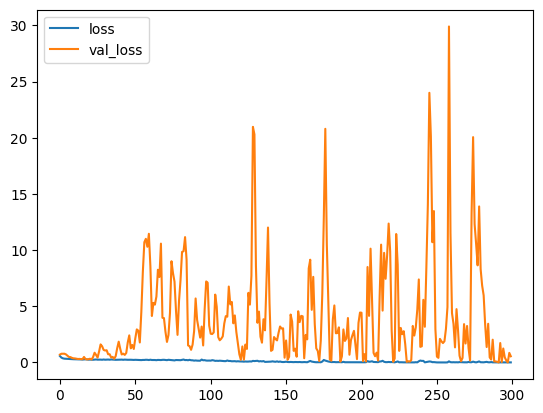

In [43]:
loss_df = pd.DataFrame(model.history.history)
loss_df[['loss', 'val_loss']].plot()

In the accuracy graph we can see that the training accuracy stabilizes after 150 epochs with still some small fluctuations, whereas the validation accuracy is very unstable, jumping up and down. The model learns patterns well but has issues of generalizing to unseen data.

<Axes: >

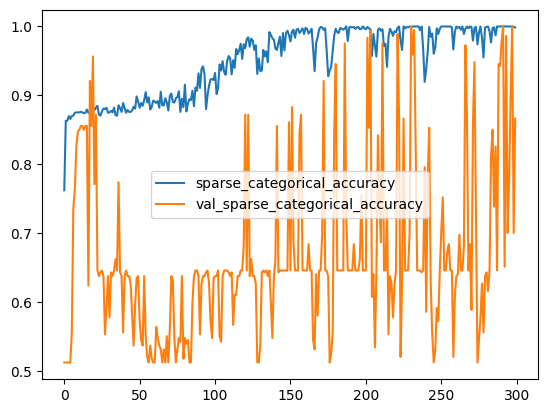

In [44]:
loss_df[['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy']].plot()


In [45]:
model5 = keras.models.load_model("best_model.keras")


 Test data evaluation reached 0.9961 and train data evaluation reached 0.9956, meaning that the model classifies 99.6% samples correctly.

In [46]:
print("Test data evaluation:")
print(model5.evaluate(x_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model5.evaluate(x_train, y_train, verbose=0))

Test data evaluation:
[0.0034342799335718155, 1.0]

Train data evaluation:
[0.00331626133993268, 1.0]


In [47]:
test_predictions = model5.predict(x_test)
test_predictions = np.argmax(test_predictions, axis=1)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


<Axes: >

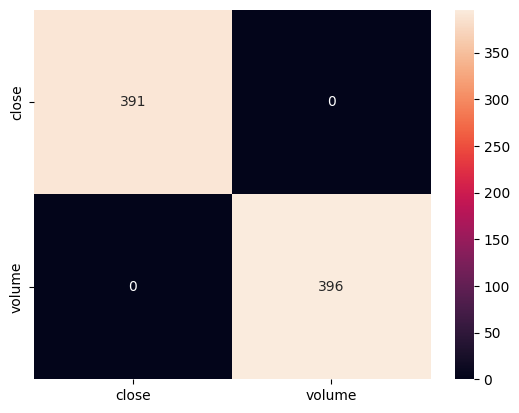

In [48]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='g', 
            xticklabels=class_names, yticklabels=class_names)

Almost all examples were correctly classified according to the heatmap plot as well as the classification report with a model accuracy of 99.62%. Only 3 examples were classified as volume, but it was a actually a close stock pattern.

In [49]:
print(classification_report(y_test, test_predictions, target_names=class_names))

acc = accuracy_score(y_test, test_predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

       close       1.00      1.00      1.00       391
      volume       1.00      1.00      1.00       396

    accuracy                           1.00       787
   macro avg       1.00      1.00      1.00       787
weighted avg       1.00      1.00      1.00       787


Model overall accuracy: 100.00%


In [50]:
roc_auc_score(y_test, model5.predict(x_test)[:, 1])

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


1.0

### Test the model

When testing the model for stock patterns, for example if the number 4 or 20 is set for the signal index, meaning the position of a certain signal in the x- and y-test dataset, the model recognizes a volume pattern, but with the number 7, the model sees a close stock pattern.

0
close


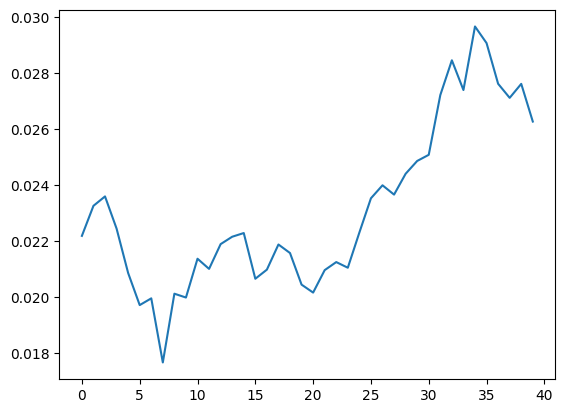

In [51]:
signal_index = 7
print(y_test[signal_index])
print(class_names[y_test[signal_index]])

plt.figure()
plt.plot(x_test[signal_index])
plt.show()

It is very important to use the same amount of points from the step size for the points in the x-axis (in this case 40).

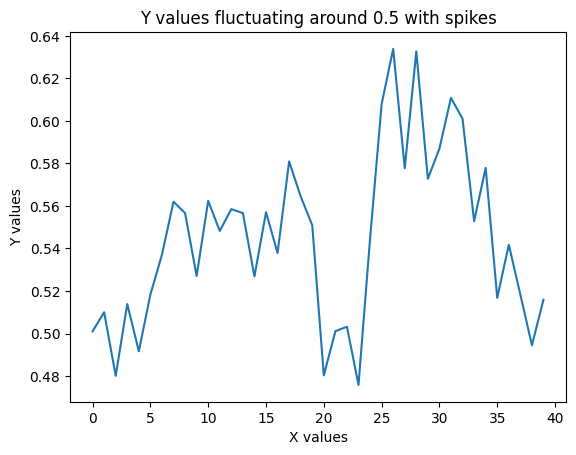

In [52]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(40)

np.random.seed(4)  
y = 0.5 + np.random.normal(0, 0.02, size=x.shape)

y[5:20] += 0.05
y[25:35] += 0.1

y = np.clip(y, 0, 1)

plt.plot(x, y)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Y values fluctuating around 0.5 with spikes')
plt.show()

For this example the model predicts a close pattern with a probability of 100%.

In [53]:
points = y
test_signal = np.expand_dims(points, axis=1)
test_batch = np.array([test_signal])

test_predict = model5.predict(test_batch)
print(test_predict)

index = np.argmax(test_predict)
print(class_names[index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[1.0000000e+00 4.8267105e-23]]
close


1
volume


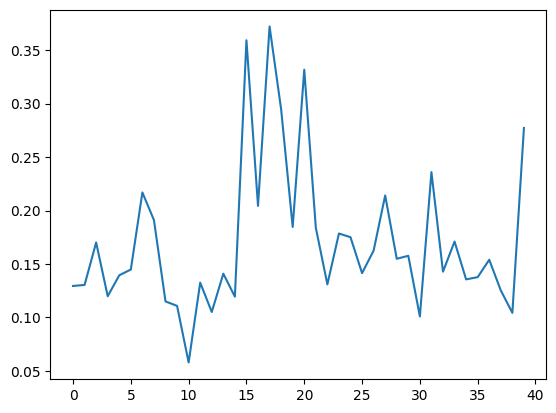

In [54]:
signal_index = 20
print(y_test[signal_index])
print(class_names[y_test[signal_index]])

plt.figure()
plt.plot(x_test[signal_index])
plt.show()

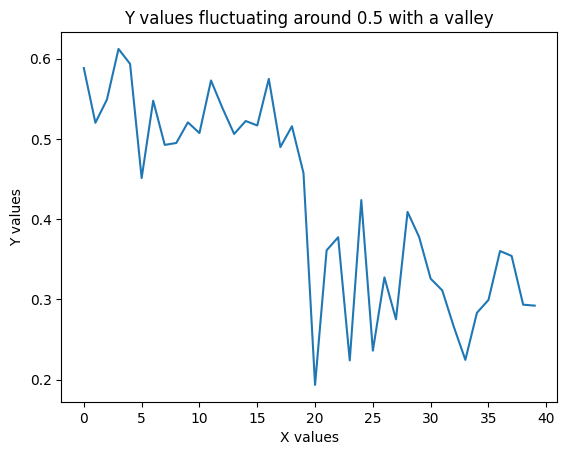

In [55]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(40)

np.random.seed(0)  
y = 0.5 + np.random.normal(0, 0.05, size=x.shape)

y[20:40] -= 0.2 + np.random.normal(0, 0.02, size=20)  

y = np.clip(y, 0, 1)

plt.plot(x, y)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Y values fluctuating around 0.5 with a valley')
plt.show()

For this example, the model predicts a volume stock pattern with a probability of 100%.

In [56]:
points = y
test_signal = np.expand_dims(points, axis=1)
test_batch = np.array([test_signal])

test_predict = model5.predict(test_batch)
print(test_predict)

index = np.argmax(test_predict)
print(class_names[index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[3.340366e-17 1.000000e+00]]
volume


### Conclusion

I built and trained a CNN model to classify stock time series signals based on "close" and "volume" data. Once I got through the challenging preprocessing step, by combining both CSV stock datasets into one and removing time zone information, the process became easier.

The model performed extremely well and is able to classify the right stock patterns when test data is given. The only interesting what made me think a lot, was the fact that in the first 2 model trainings the model classified all examples correctly and reached a model accuracy of 100%, but on the third try the model accuracy reduced to 98.4%. 

To increase the model accuracy, I increased the amount of the test signal index from 2 to 3 and reduced the amount of epochs to prevent overfitting. Through that I achieved a model accuracy of 99.6%.

In my opinion this kind of classification could be very useful in the financial industries like BlackRock or JPMorgan, when trying to recognize stock patterns or anomalies and this classification can be used in general for forecasting tasks, but also with cautiousness, because in real life stock trading it is really difficult to predict a stock pattern in general.